# Perceptron



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Metrics
import Loss
import Activations
from MultiLayerPerceptron import MultiLayerPerceptron
np.seterr('ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Important Functions
### For plotting graphs

In [2]:
def plot_loss(epoch_his, train_loss_his, test_loss_his):
    train_line, = plt.plot(epoch_his,train_loss_his,label = 'train')
    test_line, = plt.plot(epoch_his,test_loss_his,label = 'test')
    plt.xlabel('EPOCHS')
    plt.ylabel('Loss')
    plt.legend([train_line, test_line] , ['train','test'])
    plt.show()

def plot_accuracy(epoch_his, train_acc_his, test_acc_his):
    train_line, = plt.plot(epoch_his,train_acc_his,label = 'train')
    test_line, = plt.plot(epoch_his,test_acc_his,label = 'test')
    plt.xlabel('EPOCHS')
    plt.ylabel('Accuracy')
    plt.legend([train_line, test_line] , ['train','test'])
    plt.show()

# Perceptron Network
### Tested on XOR Function

In [3]:
#############################################
## Declaring Training Data        ############
#############################################
X_train = np.array([[0,0],[1,0],[0,1],[1,1]])
Y_train = np.array([[1],[0],[0],[0]])

In [4]:
# Declare a neuron with shape of weights as [shape_of_input,1]
model = MultiLayerPerceptron([2,1],['sigmoid'])

(2, 1) (1,)
<function sigmoid at 0x7ff1c97c3c80>


In [5]:
# testing the model outputs
pred, _ = model.forward(X_train)

In [6]:
#Testing the model before training
from Loss import binary_cross_entropy
loss,d_back = binary_cross_entropy(pred,Y_train)
print("The loss is {}\nAnd the error to be back propogated is:\n {}".format(loss , d_back))

The loss is [0.78729994]
And the error to be back propogated is:
 [[-0.5       ]
 [ 0.42642475]
 [ 0.72765893]
 [ 0.58708344]]


In [7]:
# Now we can train the model by iteratively on each datapoint.
layer_list = [2,3,1]
activation_list = ['sigmoid','sigmoid']
model = MultiLayerPerceptron(layer_list,activation_list)

_=model.train(X_train,
            Y_train,
            X_train,
            Y_train,
            metric ='accuracy_binary',
            loss_function_string='binary_cross_entropy',
            epochs=1000,
            record_at=100)

(2, 3) (3,)
<function sigmoid at 0x7ff1c97c3c80>
(3, 1) (1,)
<function sigmoid at 0x7ff1c97c3c80>
0th EPOCH:
Training Loss:[1.72843596]|Training Accuracy:0.25|Test Loss:[1.64921296]|Test Accuracy:0.25
100th EPOCH:
Training Loss:[0.33025916]|Training Accuracy:1.0|Test Loss:[0.32806495]|Test Accuracy:1.0
200th EPOCH:
Training Loss:[0.16266999]|Training Accuracy:1.0|Test Loss:[0.16152283]|Test Accuracy:1.0
300th EPOCH:
Training Loss:[0.08591836]|Training Accuracy:1.0|Test Loss:[0.08543885]|Test Accuracy:1.0
400th EPOCH:
Training Loss:[0.0526503]|Training Accuracy:1.0|Test Loss:[0.05242649]|Test Accuracy:1.0
500th EPOCH:
Training Loss:[0.03609553]|Training Accuracy:1.0|Test Loss:[0.03597515]|Test Accuracy:1.0
600th EPOCH:
Training Loss:[0.02671271]|Training Accuracy:1.0|Test Loss:[0.02664037]|Test Accuracy:1.0
700th EPOCH:
Training Loss:[0.02084895]|Training Accuracy:1.0|Test Loss:[0.02080179]|Test Accuracy:1.0
800th EPOCH:
Training Loss:[0.01690975]|Training Accuracy:1.0|Test Loss:[0.0168

In [8]:
# Now we can predict the values for unseen data or trained data also
# We can also calculate the accuracy of the model we have trained
model.metric_function(X_train,Y_train,metric='accuracy_binary')

1.0

# N Bit XOR

Now Lets try working with just a little better data. A n XOR operator. So lets create the dataset for n bit xor.

We would have atmost 2^n data point in this type of data set.But we would limit our dataset to a 1000 data points
whichever is smaller.

Then we can divide into training and test set

In [9]:
#Generating the dataset
n = 10
max_datapoint = 10000
datapoints = min(pow(2,n) , max_datapoint)

X = np.zeros((datapoints , n) , dtype=np.int32)
Y = np.zeros((datapoints , 1), dtype=np.int32)

for i in range(datapoints):
    tmp = i
    y_tmp = 0
    for j in range(n-1 , -1 , -1):
        X[i,j] = tmp&1
        y_tmp = y_tmp^X[i,j]
        tmp = tmp>>1
    Y[i] = y_tmp

In [10]:
# for sanity check lets print one example
ind = 11
print(X[ind] , Y[ind])

[0 0 0 0 0 0 1 0 1 1] [1]


In [11]:
# Lets divide the set in training and testing
div = 0.9
train_n = int(div * datapoints)
X_train = X[:train_n]
Y_train = Y[:train_n]
X_test = X[train_n:]
Y_test = Y[train_n:]

In [12]:
layer_list = [n,20,20,15,8,4,1]
activation_list = ['relu','sigmoid','sigmoid','sigmoid','sigmoid','sigmoid']

model = MultiLayerPerceptron(layer_list,activation_list)

(10, 20) (20,)
<function relu at 0x7ff1c97c3ea0>
(20, 20) (20,)
<function sigmoid at 0x7ff1c97c3c80>
(20, 15) (15,)
<function sigmoid at 0x7ff1c97c3c80>
(15, 8) (8,)
<function sigmoid at 0x7ff1c97c3c80>
(8, 4) (4,)
<function sigmoid at 0x7ff1c97c3c80>
(4, 1) (1,)
<function sigmoid at 0x7ff1c97c3c80>


In [13]:
train_loss_his,train_acc_his,test_loss_his,test_acc_his,epoch_his = model.train(X_train,
                                                                                Y_train ,
                                                                                X_test,
                                                                                Y_test,
                                                                                metric='accuracy_binary',
                                                                                loss_function_string='binary_cross_entropy',
                                                                                epochs = 200,
                                                                                record_at = 10,
                                                                                learning_rate= 0.1,
                                                                                learning_rate_decay=False)

0th EPOCH:
Training Loss:[0.79418132]|Training Accuracy:0.499457111834962|Test Loss:[0.77954292]|Test Accuracy:0.5048543689320388
10th EPOCH:
Training Loss:[0.73869367]|Training Accuracy:0.499457111834962|Test Loss:[0.73109302]|Test Accuracy:0.5048543689320388
20th EPOCH:
Training Loss:[0.71389918]|Training Accuracy:0.499457111834962|Test Loss:[0.70979051]|Test Accuracy:0.5048543689320388
30th EPOCH:
Training Loss:[0.70252786]|Training Accuracy:0.499457111834962|Test Loss:[0.70032312]|Test Accuracy:0.5048543689320388
40th EPOCH:
Training Loss:[0.69735073]|Training Accuracy:0.499457111834962|Test Loss:[0.69622529]|Test Accuracy:0.5048543689320388
50th EPOCH:
Training Loss:[0.69502825]|Training Accuracy:0.499457111834962|Test Loss:[0.69452997]|Test Accuracy:0.5048543689320388
60th EPOCH:
Training Loss:[0.69399992]|Training Accuracy:0.499457111834962|Test Loss:[0.69387476]|Test Accuracy:0.5048543689320388
70th EPOCH:
Training Loss:[0.69354868]|Training Accuracy:0.49728555917481|Test Loss:

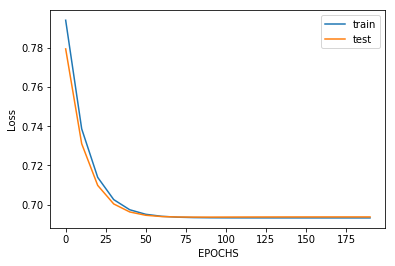

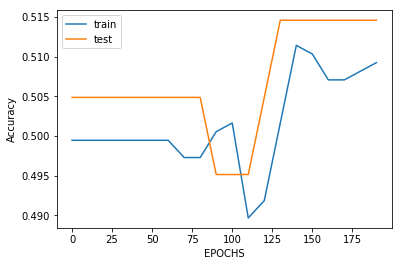

In [14]:
plot_loss(epoch_his,train_loss_his,test_loss_his)
plot_accuracy(epoch_his,train_acc_his,test_acc_his)

# Simple Multiclass classification dataset

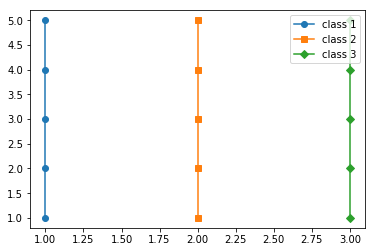

In [15]:
xcoords1 = [1,1,1,1,1]
xcoords2 = [2,2,2,2,2]
xcoords3 = [3,3,3,3,3]
ycoords = [1,2,3,4,5]
plt.plot(xcoords1, ycoords, label='class 1',marker='o')
plt.plot(xcoords2, ycoords, label='class 2',marker='s')
plt.plot(xcoords3, ycoords, label='class 3',marker='D')
plt.legend(loc='best')
plt.show()

In [16]:
#Making the dataset in correct format
dataset = [[i,j] for i in range(1,6) for j in range(1,4)]
labels = [[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1]]

In [17]:
div = 0.8
N = len(dataset)
X_train = np.array(dataset[:int(div*N)])
Y_train = np.array(labels[:int(div*N)])
X_test = np.array(dataset[int(div*N):])
Y_test = np.array(labels[int(div*N):])

In [18]:
layer_list = [2,6,5,3]
activation_list = ['sigmoid','sigmoid','softmax']
model = MultiLayerPerceptron(layer_list,activation_list)

(2, 6) (6,)
<function sigmoid at 0x7ff1c97c3c80>
(6, 5) (5,)
<function sigmoid at 0x7ff1c97c3c80>
(5, 3) (3,)
<function softmax at 0x7ff1c97c8048>


In [19]:
train_loss_his,train_acc_his,test_loss_his,test_acc_his,epoch_his = model.train(X_train,
                                                                                Y_train ,
                                                                                X_test,
                                                                                Y_test,
                                                                                metric='accuracy_multiclass',
                                                                                loss_function_string='softmax_multiclass_cross_entropy',
                                                                                epochs = 1000,
                                                                                record_at = 10,
                                                                                learning_rate= 0.01,
                                                                                learning_rate_decay=False)

0th EPOCH:
Training Loss:1.7646720865574703|Training Accuracy:0.3333333333333333|Test Loss:1.4985672184112584|Test Accuracy:0.0
10th EPOCH:
Training Loss:1.2008488733022729|Training Accuracy:0.3333333333333333|Test Loss:1.145780185266487|Test Accuracy:0.3333333333333333
20th EPOCH:
Training Loss:1.1100781882379738|Training Accuracy:0.4166666666666667|Test Loss:1.0979451249551544|Test Accuracy:0.3333333333333333
30th EPOCH:
Training Loss:1.088672152446556|Training Accuracy:0.4166666666666667|Test Loss:1.0897754701696165|Test Accuracy:0.3333333333333333
40th EPOCH:
Training Loss:1.0794109888643042|Training Accuracy:0.3333333333333333|Test Loss:1.084943900825002|Test Accuracy:0.3333333333333333
50th EPOCH:
Training Loss:1.071216723161205|Training Accuracy:0.4166666666666667|Test Loss:1.0775758848813348|Test Accuracy:0.3333333333333333
60th EPOCH:
Training Loss:1.0610043429036142|Training Accuracy:0.5|Test Loss:1.0658522922470883|Test Accuracy:0.3333333333333333
70th EPOCH:
Training Loss:1

880th EPOCH:
Training Loss:0.029170175247042133|Training Accuracy:1.0|Test Loss:0.04209720598060107|Test Accuracy:1.0
890th EPOCH:
Training Loss:0.028419610291218714|Training Accuracy:1.0|Test Loss:0.04088553416372554|Test Accuracy:1.0
900th EPOCH:
Training Loss:0.02770009089139985|Training Accuracy:1.0|Test Loss:0.03972878390432169|Test Accuracy:1.0
910th EPOCH:
Training Loss:0.027009957592789874|Training Accuracy:1.0|Test Loss:0.03862382982194729|Test Accuracy:1.0
920th EPOCH:
Training Loss:0.02634765506532687|Training Accuracy:1.0|Test Loss:0.03756774471580335|Test Accuracy:1.0
930th EPOCH:
Training Loss:0.025711724886272994|Training Accuracy:1.0|Test Loss:0.036557786985013455|Test Accuracy:1.0
940th EPOCH:
Training Loss:0.025100798850276412|Training Accuracy:1.0|Test Loss:0.035591388708754494|Test Accuracy:1.0
950th EPOCH:
Training Loss:0.024513592767742343|Training Accuracy:1.0|Test Loss:0.03466614438103263|Test Accuracy:1.0
960th EPOCH:
Training Loss:0.02394890071527206|Training 

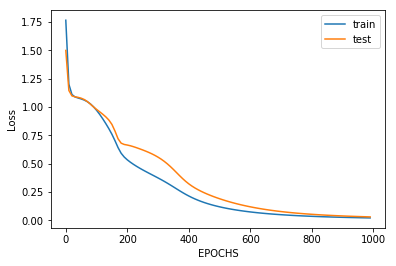

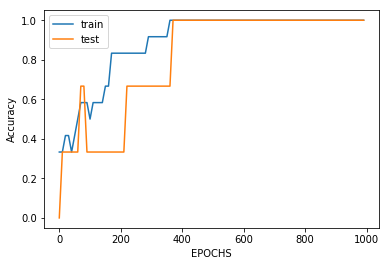

In [20]:
plot_loss(epoch_his,train_loss_his,test_loss_his)
plot_accuracy(epoch_his,train_acc_his,test_acc_his)

# Breast Cancer Wisconsin (Diagnostic) Data Set
From UCI Machine Learning Dataset Repository
By Creators:

1. Dr. William H. Wolberg, General Surgery Dept.
University of Wisconsin, Clinical Sciences Center
Madison, WI 53792
wolberg '@' eagle.surgery.wisc.edu

2. W. Nick Street, Computer Sciences Dept.
University of Wisconsin, 1210 West Dayton St., Madison, WI 53706
street '@' cs.wisc.edu 608-262-6619

3. Olvi L. Mangasarian, Computer Sciences Dept.
University of Wisconsin, 1210 West Dayton St., Madison, WI 53706
olvi '@' cs.wisc.edu

Donor:

Nick Street

Link : https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

### Data Set Information:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link]

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

### Attribute Information:

1. ID number
2. Diagnosis (M = malignant, B = benign)
3-32.

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)  
b) texture (standard deviation of gray-scale values)  
c) perimeter  
d) area  
e) smoothness (local variation in radius lengths)  
f) compactness (perimeter^2 / area - 1.0)  
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)  
i) symmetry  
j) fractal dimension ("coastline approximation" - 1)  

In [21]:
df = pd.read_csv('./Data/wdbc.txt',header = None)

In [22]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
#Dropping indexes
df = df.drop(0,axis=1)

In [24]:
#Splitting into training and testing data
df = df.sample(frac = 1.0).reset_index(drop = True)
labels = df[1]
df = df.drop(1 , axis =1)

labels = pd.get_dummies(labels)#['M']

div = 0.8
N = len(df)
X_train = df[:int(div*N)].values
Y_train = labels[:int(div*N)].values
X_test = df[int(div*N):].values
Y_test = labels[int(div*N):].values

## Testing Paper's Architecture

In [25]:
layer_list = [30,45,45,45,45,2]
activation_list = ['sigmoid','sigmoid','sigmoid','relu','softmax']
model = MultiLayerPerceptron(layer_list,activation_list)

(30, 45) (45,)
<function sigmoid at 0x7ff1c97c3c80>
(45, 45) (45,)
<function sigmoid at 0x7ff1c97c3c80>
(45, 45) (45,)
<function sigmoid at 0x7ff1c97c3c80>
(45, 45) (45,)
<function relu at 0x7ff1c97c3ea0>
(45, 2) (2,)
<function softmax at 0x7ff1c97c8048>


In [26]:
train_loss_his,train_acc_his,test_loss_his,test_acc_his,epoch_his = model.train(X_train,
                                                                                Y_train ,
                                                                                X_test,
                                                                                Y_test,
                                                                                metric='accuracy_multiclass',
                                                                                loss_function_string='softmax_multiclass_cross_entropy',
                                                                                epochs = 20000,
                                                                                record_at = 20,
                                                                                learning_rate= 0.00000001,
                                                                                learning_rate_decay=False)

0th EPOCH:
Training Loss:15.753730537345463|Training Accuracy:0.378021978021978|Test Loss:16.44126548857503|Test Accuracy:0.3508771929824561
20th EPOCH:
Training Loss:15.753730537345463|Training Accuracy:0.378021978021978|Test Loss:16.44126548857503|Test Accuracy:0.3508771929824561
40th EPOCH:
Training Loss:15.544554148237381|Training Accuracy:0.378021978021978|Test Loss:16.14186454706234|Test Accuracy:0.3508771929824561
60th EPOCH:
Training Loss:11.404070092797985|Training Accuracy:0.378021978021978|Test Loss:11.699079846080936|Test Accuracy:0.3508771929824561
80th EPOCH:
Training Loss:8.114753421030985|Training Accuracy:0.378021978021978|Test Loss:8.327127691140012|Test Accuracy:0.3508771929824561
100th EPOCH:
Training Loss:5.313408058871789|Training Accuracy:0.378021978021978|Test Loss:5.440881597759563|Test Accuracy:0.3508771929824561
120th EPOCH:
Training Loss:2.3845409889762204|Training Accuracy:0.378021978021978|Test Loss:2.306928430029992|Test Accuracy:0.3508771929824561
140th 

1160th EPOCH:
Training Loss:0.6119297794484254|Training Accuracy:0.701098901098901|Test Loss:0.5901130601938557|Test Accuracy:0.7456140350877193
1180th EPOCH:
Training Loss:0.6114059747518092|Training Accuracy:0.701098901098901|Test Loss:0.5893322712757195|Test Accuracy:0.7456140350877193
1200th EPOCH:
Training Loss:0.6108788298728637|Training Accuracy:0.701098901098901|Test Loss:0.5885486472945235|Test Accuracy:0.7456140350877193
1220th EPOCH:
Training Loss:0.6103203032270148|Training Accuracy:0.701098901098901|Test Loss:0.5877596983451586|Test Accuracy:0.7456140350877193
1240th EPOCH:
Training Loss:0.609758347780364|Training Accuracy:0.701098901098901|Test Loss:0.586991877919949|Test Accuracy:0.7456140350877193
1260th EPOCH:
Training Loss:0.6092747015055583|Training Accuracy:0.701098901098901|Test Loss:0.5863170813223225|Test Accuracy:0.7456140350877193
1280th EPOCH:
Training Loss:0.6086828827329006|Training Accuracy:0.701098901098901|Test Loss:0.5854566567798108|Test Accuracy:0.7456

2340th EPOCH:
Training Loss:0.5659563045079242|Training Accuracy:0.7186813186813187|Test Loss:0.5462408935308902|Test Accuracy:0.7631578947368421
2360th EPOCH:
Training Loss:0.5656706317148287|Training Accuracy:0.7186813186813187|Test Loss:0.545629144547122|Test Accuracy:0.7631578947368421
2380th EPOCH:
Training Loss:0.565399186292701|Training Accuracy:0.7186813186813187|Test Loss:0.5450534612141995|Test Accuracy:0.7631578947368421
2400th EPOCH:
Training Loss:0.5651199164836141|Training Accuracy:0.7186813186813187|Test Loss:0.5444642090078731|Test Accuracy:0.7631578947368421
2420th EPOCH:
Training Loss:0.564845623680901|Training Accuracy:0.7186813186813187|Test Loss:0.5438752901892304|Test Accuracy:0.7631578947368421
2440th EPOCH:
Training Loss:0.5645968487116312|Training Accuracy:0.7186813186813187|Test Loss:0.5433137157672122|Test Accuracy:0.7631578947368421
2460th EPOCH:
Training Loss:0.5643337291720062|Training Accuracy:0.7186813186813187|Test Loss:0.5427396222010699|Test Accuracy:

3500th EPOCH:
Training Loss:0.49380299642220055|Training Accuracy:0.7208791208791209|Test Loss:0.5113198174416764|Test Accuracy:0.6842105263157895
3520th EPOCH:
Training Loss:0.4928877224791441|Training Accuracy:0.7208791208791209|Test Loss:0.511225195464821|Test Accuracy:0.6842105263157895
3540th EPOCH:
Training Loss:0.49233217675132573|Training Accuracy:0.7164835164835165|Test Loss:0.5112241998915511|Test Accuracy:0.6842105263157895
3560th EPOCH:
Training Loss:0.4920975493165535|Training Accuracy:0.7164835164835165|Test Loss:0.5113644763473888|Test Accuracy:0.6842105263157895
3580th EPOCH:
Training Loss:0.49203322931425647|Training Accuracy:0.7186813186813187|Test Loss:0.5115251349095193|Test Accuracy:0.6842105263157895
3600th EPOCH:
Training Loss:0.49205662206929|Training Accuracy:0.7208791208791209|Test Loss:0.5116639297820855|Test Accuracy:0.6842105263157895
3620th EPOCH:
Training Loss:0.4921075435966439|Training Accuracy:0.7208791208791209|Test Loss:0.5117720531522318|Test Accura

4640th EPOCH:
Training Loss:0.49177607824696884|Training Accuracy:0.7230769230769231|Test Loss:0.5117387781756814|Test Accuracy:0.6842105263157895
4660th EPOCH:
Training Loss:0.49177466879685366|Training Accuracy:0.7230769230769231|Test Loss:0.5117356069456599|Test Accuracy:0.6842105263157895
4680th EPOCH:
Training Loss:0.49177106926778114|Training Accuracy:0.7230769230769231|Test Loss:0.5117327838214931|Test Accuracy:0.6842105263157895
4700th EPOCH:
Training Loss:0.4917718031003599|Training Accuracy:0.7230769230769231|Test Loss:0.5117499481179285|Test Accuracy:0.6842105263157895
4720th EPOCH:
Training Loss:0.4917792114381595|Training Accuracy:0.7230769230769231|Test Loss:0.5117625004169429|Test Accuracy:0.6842105263157895
4740th EPOCH:
Training Loss:0.4917553107954386|Training Accuracy:0.7230769230769231|Test Loss:0.5117508696424555|Test Accuracy:0.6842105263157895
4760th EPOCH:
Training Loss:0.49173488284733796|Training Accuracy:0.7230769230769231|Test Loss:0.5117444703630591|Test Ac

5760th EPOCH:
Training Loss:0.49161861066787066|Training Accuracy:0.7230769230769231|Test Loss:0.5119250323982025|Test Accuracy:0.6842105263157895
5780th EPOCH:
Training Loss:0.4917170426656211|Training Accuracy:0.7230769230769231|Test Loss:0.5120425171011358|Test Accuracy:0.6842105263157895
5800th EPOCH:
Training Loss:0.49174205860766973|Training Accuracy:0.7230769230769231|Test Loss:0.5120484847640324|Test Accuracy:0.6842105263157895
5820th EPOCH:
Training Loss:0.4917470503048933|Training Accuracy:0.7230769230769231|Test Loss:0.5120495839040794|Test Accuracy:0.6842105263157895
5840th EPOCH:
Training Loss:0.49174382340292644|Training Accuracy:0.7230769230769231|Test Loss:0.5120471845958537|Test Accuracy:0.6842105263157895
5860th EPOCH:
Training Loss:0.4917362354976447|Training Accuracy:0.7230769230769231|Test Loss:0.5120430056913703|Test Accuracy:0.6842105263157895
5880th EPOCH:
Training Loss:0.49172671386474914|Training Accuracy:0.7230769230769231|Test Loss:0.5120383675922836|Test Ac

6940th EPOCH:
Training Loss:0.49143142104525894|Training Accuracy:0.7230769230769231|Test Loss:0.5122003023576381|Test Accuracy:0.6842105263157895
6960th EPOCH:
Training Loss:0.4914251798632546|Training Accuracy:0.7230769230769231|Test Loss:0.5122015079776137|Test Accuracy:0.6842105263157895
6980th EPOCH:
Training Loss:0.4914191938783549|Training Accuracy:0.7230769230769231|Test Loss:0.5122030432799095|Test Accuracy:0.6842105263157895
7000th EPOCH:
Training Loss:0.4914133900371304|Training Accuracy:0.7230769230769231|Test Loss:0.5122048206838569|Test Accuracy:0.6842105263157895
7020th EPOCH:
Training Loss:0.4914077445920998|Training Accuracy:0.7230769230769231|Test Loss:0.5122067913166541|Test Accuracy:0.6842105263157895
7040th EPOCH:
Training Loss:0.49140225383821307|Training Accuracy:0.7230769230769231|Test Loss:0.5122089254732765|Test Accuracy:0.6842105263157895
7060th EPOCH:
Training Loss:0.4913837491530263|Training Accuracy:0.7230769230769231|Test Loss:0.5122040715458833|Test Accu

8160th EPOCH:
Training Loss:0.491251771589466|Training Accuracy:0.7230769230769231|Test Loss:0.5123968676968381|Test Accuracy:0.6842105263157895
8180th EPOCH:
Training Loss:0.491238195377295|Training Accuracy:0.7230769230769231|Test Loss:0.5124030031574743|Test Accuracy:0.6842105263157895
8200th EPOCH:
Training Loss:0.49125510078301526|Training Accuracy:0.7230769230769231|Test Loss:0.5124175722762963|Test Accuracy:0.6842105263157895
8220th EPOCH:
Training Loss:0.49120330629621123|Training Accuracy:0.7230769230769231|Test Loss:0.5123923626635744|Test Accuracy:0.6842105263157895
8240th EPOCH:
Training Loss:0.4912406813875274|Training Accuracy:0.7230769230769231|Test Loss:0.5124247825659556|Test Accuracy:0.6842105263157895
8260th EPOCH:
Training Loss:0.49117240569595305|Training Accuracy:0.7230769230769231|Test Loss:0.5123854290496813|Test Accuracy:0.6842105263157895
8280th EPOCH:
Training Loss:0.4912204470119983|Training Accuracy:0.7230769230769231|Test Loss:0.5124411920410812|Test Accur

9380th EPOCH:
Training Loss:0.490966958116853|Training Accuracy:0.7230769230769231|Test Loss:0.5125457235829982|Test Accuracy:0.6842105263157895
9400th EPOCH:
Training Loss:0.49096407066399056|Training Accuracy:0.7230769230769231|Test Loss:0.5125506442529353|Test Accuracy:0.6842105263157895
9420th EPOCH:
Training Loss:0.4912965509354194|Training Accuracy:0.7230769230769231|Test Loss:0.5128893864709776|Test Accuracy:0.6842105263157895
9440th EPOCH:
Training Loss:0.4912755005034174|Training Accuracy:0.7230769230769231|Test Loss:0.5127659488985513|Test Accuracy:0.6842105263157895
9460th EPOCH:
Training Loss:0.49119689435003516|Training Accuracy:0.7230769230769231|Test Loss:0.5126510680976127|Test Accuracy:0.6842105263157895
9480th EPOCH:
Training Loss:0.4911032929284839|Training Accuracy:0.7230769230769231|Test Loss:0.5125755648099433|Test Accuracy:0.6842105263157895
9500th EPOCH:
Training Loss:0.49101208454484874|Training Accuracy:0.7230769230769231|Test Loss:0.51248747872981|Test Accura

10500th EPOCH:
Training Loss:0.4905401968361702|Training Accuracy:0.7230769230769231|Test Loss:0.5126414101822256|Test Accuracy:0.6842105263157895
10520th EPOCH:
Training Loss:0.4905741524585005|Training Accuracy:0.7230769230769231|Test Loss:0.5126983491755734|Test Accuracy:0.6842105263157895
10540th EPOCH:
Training Loss:0.4905809914407499|Training Accuracy:0.7230769230769231|Test Loss:0.5127128559168626|Test Accuracy:0.6842105263157895
10560th EPOCH:
Training Loss:0.49058194238538433|Training Accuracy:0.7230769230769231|Test Loss:0.5127242212624924|Test Accuracy:0.6842105263157895
10580th EPOCH:
Training Loss:0.49059056544065544|Training Accuracy:0.7230769230769231|Test Loss:0.5127437117277636|Test Accuracy:0.6842105263157895
10600th EPOCH:
Training Loss:0.49059560420303416|Training Accuracy:0.7230769230769231|Test Loss:0.5127618586484181|Test Accuracy:0.6842105263157895
10620th EPOCH:
Training Loss:0.49060801562859585|Training Accuracy:0.7230769230769231|Test Loss:0.5127568378748191|

11680th EPOCH:
Training Loss:0.49118985732946735|Training Accuracy:0.7230769230769231|Test Loss:0.5136205374452595|Test Accuracy:0.6842105263157895
11700th EPOCH:
Training Loss:0.4912040306852843|Training Accuracy:0.7230769230769231|Test Loss:0.5136277555012668|Test Accuracy:0.6842105263157895
11720th EPOCH:
Training Loss:0.49122101549597075|Training Accuracy:0.7230769230769231|Test Loss:0.5136358989664616|Test Accuracy:0.6842105263157895
11740th EPOCH:
Training Loss:0.49123770669327005|Training Accuracy:0.7230769230769231|Test Loss:0.5136443710046789|Test Accuracy:0.6842105263157895
11760th EPOCH:
Training Loss:0.49125314560035116|Training Accuracy:0.7230769230769231|Test Loss:0.5136532860280065|Test Accuracy:0.6842105263157895
11780th EPOCH:
Training Loss:0.4912672345449765|Training Accuracy:0.7230769230769231|Test Loss:0.5136626543714776|Test Accuracy:0.6842105263157895
11800th EPOCH:
Training Loss:0.49128010274862455|Training Accuracy:0.7230769230769231|Test Loss:0.5136724260235672

12860th EPOCH:
Training Loss:0.491642600936519|Training Accuracy:0.7252747252747253|Test Loss:0.51406124195602|Test Accuracy:0.6842105263157895
12880th EPOCH:
Training Loss:0.4916445152041899|Training Accuracy:0.7274725274725274|Test Loss:0.5140638268861465|Test Accuracy:0.6842105263157895
12900th EPOCH:
Training Loss:0.491646051725469|Training Accuracy:0.7274725274725274|Test Loss:0.5140697273104745|Test Accuracy:0.6842105263157895
12920th EPOCH:
Training Loss:0.4916471292018204|Training Accuracy:0.7274725274725274|Test Loss:0.5140786371937831|Test Accuracy:0.6842105263157895
12940th EPOCH:
Training Loss:0.4916545200445021|Training Accuracy:0.7274725274725274|Test Loss:0.5140864564893768|Test Accuracy:0.6842105263157895
12960th EPOCH:
Training Loss:0.4916518838943344|Training Accuracy:0.7274725274725274|Test Loss:0.5140938342431185|Test Accuracy:0.6842105263157895
12980th EPOCH:
Training Loss:0.49165418048424125|Training Accuracy:0.7274725274725274|Test Loss:0.5140979180789211|Test Ac

14000th EPOCH:
Training Loss:0.47569082759039893|Training Accuracy:0.7692307692307693|Test Loss:0.49247151698753544|Test Accuracy:0.7280701754385965
14020th EPOCH:
Training Loss:0.47521232444987577|Training Accuracy:0.7692307692307693|Test Loss:0.49194792231591106|Test Accuracy:0.7280701754385965
14040th EPOCH:
Training Loss:0.4747767397502632|Training Accuracy:0.7692307692307693|Test Loss:0.49126666922892936|Test Accuracy:0.7280701754385965
14060th EPOCH:
Training Loss:0.47434526842796765|Training Accuracy:0.7692307692307693|Test Loss:0.4904528801117266|Test Accuracy:0.7280701754385965
14080th EPOCH:
Training Loss:0.47383426927849004|Training Accuracy:0.7692307692307693|Test Loss:0.48935296298761616|Test Accuracy:0.7368421052631579
14100th EPOCH:
Training Loss:0.4732101260729878|Training Accuracy:0.7692307692307693|Test Loss:0.4879416441490275|Test Accuracy:0.7456140350877193
14120th EPOCH:
Training Loss:0.472526030044325|Training Accuracy:0.7758241758241758|Test Loss:0.48692596381959

15180th EPOCH:
Training Loss:0.39219378430734214|Training Accuracy:0.8527472527472527|Test Loss:0.44106631308716354|Test Accuracy:0.8245614035087719
15200th EPOCH:
Training Loss:0.39226177176109506|Training Accuracy:0.8527472527472527|Test Loss:0.44089890625064265|Test Accuracy:0.8245614035087719
15220th EPOCH:
Training Loss:0.3924254162882787|Training Accuracy:0.8527472527472527|Test Loss:0.4410751485331218|Test Accuracy:0.8245614035087719
15240th EPOCH:
Training Loss:0.39258859676601865|Training Accuracy:0.8505494505494505|Test Loss:0.44139736473254226|Test Accuracy:0.8245614035087719
15260th EPOCH:
Training Loss:0.39269968384234943|Training Accuracy:0.8505494505494505|Test Loss:0.4417165700676872|Test Accuracy:0.8245614035087719
15280th EPOCH:
Training Loss:0.392745424208707|Training Accuracy:0.8505494505494505|Test Loss:0.4418559841246638|Test Accuracy:0.8245614035087719
15300th EPOCH:
Training Loss:0.39284710397107714|Training Accuracy:0.8527472527472527|Test Loss:0.44167258515585

16320th EPOCH:
Training Loss:0.3544482870970006|Training Accuracy:0.8813186813186813|Test Loss:0.3295009501779856|Test Accuracy:0.8947368421052632
16340th EPOCH:
Training Loss:0.35441157495567827|Training Accuracy:0.8813186813186813|Test Loss:0.32949519986997133|Test Accuracy:0.8947368421052632
16360th EPOCH:
Training Loss:0.35437866327923406|Training Accuracy:0.8813186813186813|Test Loss:0.3294947140871244|Test Accuracy:0.8947368421052632
16380th EPOCH:
Training Loss:0.3543440234414337|Training Accuracy:0.8813186813186813|Test Loss:0.32949259135931735|Test Accuracy:0.8947368421052632
16400th EPOCH:
Training Loss:0.35430764935806863|Training Accuracy:0.8813186813186813|Test Loss:0.3294885415364333|Test Accuracy:0.8947368421052632
16420th EPOCH:
Training Loss:0.35426966566759277|Training Accuracy:0.8813186813186813|Test Loss:0.32948263397408023|Test Accuracy:0.8947368421052632
16440th EPOCH:
Training Loss:0.3542365220616082|Training Accuracy:0.8813186813186813|Test Loss:0.32948188937467

17480th EPOCH:
Training Loss:0.3517330264971854|Training Accuracy:0.8813186813186813|Test Loss:0.3249132246000247|Test Accuracy:0.8947368421052632
17500th EPOCH:
Training Loss:0.3517081294916196|Training Accuracy:0.8813186813186813|Test Loss:0.32492454287640055|Test Accuracy:0.8947368421052632
17520th EPOCH:
Training Loss:0.35168111478721725|Training Accuracy:0.8813186813186813|Test Loss:0.32490268486578305|Test Accuracy:0.8947368421052632
17540th EPOCH:
Training Loss:0.35165453794720625|Training Accuracy:0.8813186813186813|Test Loss:0.3248947770295296|Test Accuracy:0.8947368421052632
17560th EPOCH:
Training Loss:0.35162936072913276|Training Accuracy:0.8813186813186813|Test Loss:0.32489810468887964|Test Accuracy:0.8947368421052632
17580th EPOCH:
Training Loss:0.35160322253963894|Training Accuracy:0.8813186813186813|Test Loss:0.3249075456399664|Test Accuracy:0.8947368421052632
17600th EPOCH:
Training Loss:0.3515587422527591|Training Accuracy:0.8813186813186813|Test Loss:0.32490014754220

18660th EPOCH:
Training Loss:0.35067048153427904|Training Accuracy:0.8813186813186813|Test Loss:0.3282956293807137|Test Accuracy:0.8859649122807017
18680th EPOCH:
Training Loss:0.3506671837539583|Training Accuracy:0.8813186813186813|Test Loss:0.3283436909504966|Test Accuracy:0.8859649122807017
18700th EPOCH:
Training Loss:0.35066394667401035|Training Accuracy:0.8813186813186813|Test Loss:0.3283918676512542|Test Accuracy:0.8859649122807017
18720th EPOCH:
Training Loss:0.35066076854170997|Training Accuracy:0.8813186813186813|Test Loss:0.3284459636546176|Test Accuracy:0.8859649122807017
18740th EPOCH:
Training Loss:0.3506576462943366|Training Accuracy:0.8813186813186813|Test Loss:0.32850291217574645|Test Accuracy:0.8859649122807017
18760th EPOCH:
Training Loss:0.3506545763753384|Training Accuracy:0.8813186813186813|Test Loss:0.32855986979658414|Test Accuracy:0.8859649122807017
18780th EPOCH:
Training Loss:0.3506515551124346|Training Accuracy:0.8813186813186813|Test Loss:0.3286168098753294

19840th EPOCH:
Training Loss:0.35056785122169276|Training Accuracy:0.8813186813186813|Test Loss:0.3296198211011129|Test Accuracy:0.8859649122807017
19860th EPOCH:
Training Loss:0.35055705943646365|Training Accuracy:0.8813186813186813|Test Loss:0.32962741876350227|Test Accuracy:0.8859649122807017
19880th EPOCH:
Training Loss:0.35054770650504385|Training Accuracy:0.8813186813186813|Test Loss:0.32963192481151377|Test Accuracy:0.8859649122807017
19900th EPOCH:
Training Loss:0.35054343339181593|Training Accuracy:0.8813186813186813|Test Loss:0.32963345253466003|Test Accuracy:0.8859649122807017
19920th EPOCH:
Training Loss:0.35052645672643484|Training Accuracy:0.8813186813186813|Test Loss:0.32962606743681055|Test Accuracy:0.8859649122807017
19940th EPOCH:
Training Loss:0.3505165751711949|Training Accuracy:0.8813186813186813|Test Loss:0.3296333588403405|Test Accuracy:0.8859649122807017
19960th EPOCH:
Training Loss:0.3505127435285559|Training Accuracy:0.8813186813186813|Test Loss:0.329633998440

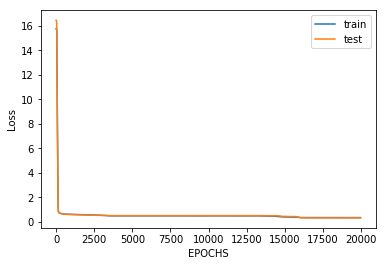

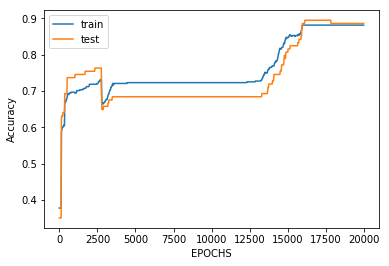

In [27]:
plot_loss(epoch_his,train_loss_his,test_loss_his)
plot_accuracy(epoch_his,train_acc_his,test_acc_his)

In [28]:
#Accuracy on Test Set
import Metrics
Metrics.accuracy_multiclass(model.forward(X_test)[0],Y_test)

0.8859649122807017

## Proposing better model
### Changing only activations (sigmoid to relu)

In [29]:
layer_list = [30,45,45,45,45,2]
activation_list = ['relu','relu','relu','relu','softmax']
model = MultiLayerPerceptron(layer_list,activation_list)

(30, 45) (45,)
<function relu at 0x7ff1c97c3ea0>
(45, 45) (45,)
<function relu at 0x7ff1c97c3ea0>
(45, 45) (45,)
<function relu at 0x7ff1c97c3ea0>
(45, 45) (45,)
<function relu at 0x7ff1c97c3ea0>
(45, 2) (2,)
<function softmax at 0x7ff1c97c8048>


In [30]:
train_loss_his,train_acc_his,test_loss_his,test_acc_his,epoch_his = model.train(X_train,
                                                                                Y_train ,
                                                                                X_test,
                                                                                Y_test,
                                                                                metric='accuracy_multiclass',
                                                                                loss_function_string='softmax_multiclass_cross_entropy',
                                                                                epochs = 20000,
                                                                                record_at = 50,
                                                                                learning_rate= 0.00000001,
                                                                                learning_rate_decay=False)

0th EPOCH:
Training Loss:15.753730537345463|Training Accuracy:0.378021978021978|Test Loss:0.8970857286413019|Test Accuracy:0.6491228070175439
50th EPOCH:
Training Loss:0.71777269840655|Training Accuracy:0.8901098901098901|Test Loss:0.9766299498066728|Test Accuracy:0.6578947368421053
100th EPOCH:
Training Loss:1.0831920975090814|Training Accuracy:0.9010989010989011|Test Loss:0.3802654624417814|Test Accuracy:0.8508771929824561
150th EPOCH:
Training Loss:0.9544019829528415|Training Accuracy:0.9098901098901099|Test Loss:0.3681049855900279|Test Accuracy:0.8508771929824561
200th EPOCH:
Training Loss:0.8759815467911872|Training Accuracy:0.9120879120879121|Test Loss:0.3741852240159047|Test Accuracy:0.868421052631579
250th EPOCH:
Training Loss:0.7416992939291471|Training Accuracy:0.9164835164835164|Test Loss:0.36810498559002797|Test Accuracy:0.8771929824561403
300th EPOCH:
Training Loss:0.6723217979997536|Training Accuracy:0.9164835164835164|Test Loss:0.3559445087382746|Test Accuracy:0.87719298

2850th EPOCH:
Training Loss:0.43829150355603363|Training Accuracy:0.9274725274725275|Test Loss:0.3377037934606444|Test Accuracy:0.9122807017543859
2900th EPOCH:
Training Loss:0.5450550870076957|Training Accuracy:0.9274725274725275|Test Loss:0.3316235550347677|Test Accuracy:0.9122807017543859
2950th EPOCH:
Training Loss:0.5100168778647632|Training Accuracy:0.9142857142857143|Test Loss:0.38026546244178144|Test Accuracy:0.9210526315789473
3000th EPOCH:
Training Loss:0.6275826772204831|Training Accuracy:0.8967032967032967|Test Loss:0.17632691436042466|Test Accuracy:0.9385964912280702
3050th EPOCH:
Training Loss:0.5534965670483344|Training Accuracy:0.9164835164835164|Test Loss:0.17024667593454795|Test Accuracy:0.9210526315789473
3100th EPOCH:
Training Loss:0.875310718022285|Training Accuracy:0.8835164835164835|Test Loss:0.18848739121217808|Test Accuracy:0.9385964912280702
3150th EPOCH:
Training Loss:0.5474029654610821|Training Accuracy:0.8967032967032967|Test Loss:0.18240715278630135|Test A

5700th EPOCH:
Training Loss:1.0377412415700016|Training Accuracy:0.8703296703296703|Test Loss:0.8428647044373855|Test Accuracy:0.9298245614035088
5750th EPOCH:
Training Loss:0.7083100409480574|Training Accuracy:0.8945054945054945|Test Loss:0.18848739121217808|Test Accuracy:0.9385964912280702
5800th EPOCH:
Training Loss:0.6450273478408448|Training Accuracy:0.9098901098901099|Test Loss:0.39242593929353475|Test Accuracy:0.9210526315789473
5850th EPOCH:
Training Loss:0.9729338991671191|Training Accuracy:0.8945054945054945|Test Loss:0.18848739121217808|Test Accuracy:0.9385964912280702
5900th EPOCH:
Training Loss:0.5519731666515215|Training Accuracy:0.9142857142857143|Test Loss:0.3802654624417814|Test Accuracy:0.9210526315789473
5950th EPOCH:
Training Loss:0.601546457422345|Training Accuracy:0.9120879120879121|Test Loss:0.17024667593454798|Test Accuracy:0.9210526315789473
6000th EPOCH:
Training Loss:0.5337106076252509|Training Accuracy:0.9142857142857143|Test Loss:0.16416643750867121|Test Ac

8700th EPOCH:
Training Loss:0.601546457422345|Training Accuracy:0.9186813186813186|Test Loss:0.15808619908279453|Test Accuracy:0.9210526315789473
8750th EPOCH:
Training Loss:0.6961228377735529|Training Accuracy:0.9098901098901099|Test Loss:0.17632691436042466|Test Accuracy:0.9210526315789473
8800th EPOCH:
Training Loss:1.028600791525195|Training Accuracy:0.8879120879120879|Test Loss:0.40478998611242056|Test Accuracy:0.9473684210526315
8850th EPOCH:
Training Loss:0.5321689614929515|Training Accuracy:0.9186813186813186|Test Loss:0.16416643750867124|Test Accuracy:0.9210526315789473
8900th EPOCH:
Training Loss:1.025553990731569|Training Accuracy:0.8923076923076924|Test Loss:0.4045864161452883|Test Accuracy:0.9473684210526315
8950th EPOCH:
Training Loss:1.0751272815023925|Training Accuracy:0.8945054945054945|Test Loss:0.3863457008676581|Test Accuracy:0.9473684210526315
9000th EPOCH:
Training Loss:0.3841480115171828|Training Accuracy:0.9340659340659341|Test Loss:0.5173213878384942|Test Accur

11650th EPOCH:
Training Loss:0.7396740848164947|Training Accuracy:0.9164835164835164|Test Loss:0.19456876681097823|Test Accuracy:0.9473684210526315
11700th EPOCH:
Training Loss:0.48411907144406036|Training Accuracy:0.9142857142857143|Test Loss:0.17024667593454798|Test Accuracy:0.9298245614035088
11750th EPOCH:
Training Loss:0.5551134185654294|Training Accuracy:0.9208791208791208|Test Loss:0.16416643750867124|Test Accuracy:0.9210526315789473
11800th EPOCH:
Training Loss:0.6343623438282248|Training Accuracy:0.9186813186813186|Test Loss:0.17024667593454798|Test Accuracy:0.9298245614035088
11850th EPOCH:
Training Loss:0.5260753599056993|Training Accuracy:0.9208791208791208|Test Loss:0.1884873912121781|Test Accuracy:0.9210526315789473
11900th EPOCH:
Training Loss:1.0736038811055792|Training Accuracy:0.8967032967032967|Test Loss:0.3620247471641513|Test Accuracy:0.9473684210526315
11950th EPOCH:
Training Loss:0.3200396392114897|Training Accuracy:0.9318681318681319|Test Loss:0.7395006511974813

14550th EPOCH:
Training Loss:0.909650004824978|Training Accuracy:0.9010989010989011|Test Loss:0.47146903882993213|Test Accuracy:0.9210526315789473
14600th EPOCH:
Training Loss:0.6541665489867946|Training Accuracy:0.9406593406593406|Test Loss:0.523401626264371|Test Accuracy:0.9122807017543859
14650th EPOCH:
Training Loss:0.5741252502797098|Training Accuracy:0.9230769230769231|Test Loss:0.6450063947819052|Test Accuracy:0.9122807017543859
14700th EPOCH:
Training Loss:0.8989862020472863|Training Accuracy:0.9010989010989011|Test Loss:0.788142558604495|Test Accuracy:0.9298245614035088
14750th EPOCH:
Training Loss:0.9996561839857467|Training Accuracy:0.9208791208791208|Test Loss:0.6146052026525217|Test Accuracy:0.9122807017543859
14800th EPOCH:
Training Loss:0.4688850827837655|Training Accuracy:0.9318681318681319|Test Loss:0.3620247471641513|Test Accuracy:0.9210526315789473
14850th EPOCH:
Training Loss:0.48564247151575407|Training Accuracy:0.9230769230769231|Test Loss:0.3559445087382746|Test 

17450th EPOCH:
Training Loss:0.9546530944053623|Training Accuracy:0.9208791208791208|Test Loss:0.6571668716336587|Test Accuracy:0.9122807017543859
17500th EPOCH:
Training Loss:0.47040846754762344|Training Accuracy:0.9318681318681319|Test Loss:0.7942227970303717|Test Accuracy:0.9122807017543859
17550th EPOCH:
Training Loss:0.5321689614929515|Training Accuracy:0.9340659340659341|Test Loss:0.5355621031161244|Test Accuracy:0.9122807017543859
17600th EPOCH:
Training Loss:0.39106609116454616|Training Accuracy:0.9340659340659341|Test Loss:0.7455808896233579|Test Accuracy:0.9035087719298246
17650th EPOCH:
Training Loss:0.9966093831921206|Training Accuracy:0.9274725274725275|Test Loss:0.7942227970303717|Test Accuracy:0.9210526315789473
17700th EPOCH:
Training Loss:0.8296087061178931|Training Accuracy:0.9318681318681319|Test Loss:0.5781237720972614|Test Accuracy:0.9298245614035088
17750th EPOCH:
Training Loss:0.8928926004600343|Training Accuracy:0.9164835164835164|Test Loss:0.5477225799678779|Te

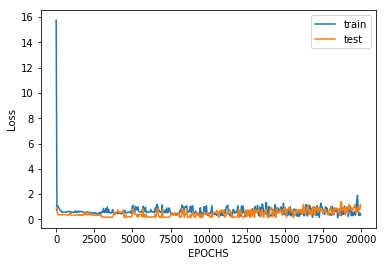

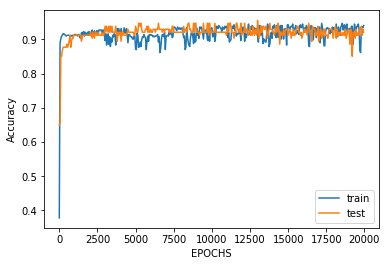

In [31]:
plot_loss(epoch_his,train_loss_his,test_loss_his)
plot_accuracy(epoch_his,train_acc_his,test_acc_his)

In [32]:
#Accuracy on Test Set
import Metrics
Metrics.accuracy_multiclass(model.forward(X_test)[0],Y_test)

0.9122807017543859

### Changing Architecture

In [33]:
layer_list = [30,64,64,64,64,2]
activation_list = ['relu','relu','relu','relu','softmax']
model = MultiLayerPerceptron(layer_list,activation_list)

(30, 64) (64,)
<function relu at 0x7ff1c97c3ea0>
(64, 64) (64,)
<function relu at 0x7ff1c97c3ea0>
(64, 64) (64,)
<function relu at 0x7ff1c97c3ea0>
(64, 64) (64,)
<function relu at 0x7ff1c97c3ea0>
(64, 2) (2,)
<function softmax at 0x7ff1c97c8048>


In [34]:
train_loss_his,train_acc_his,test_loss_his,test_acc_his,epoch_his = model.train(X_train,
                                                                                Y_train ,
                                                                                X_test,
                                                                                Y_test,
                                                                                metric='accuracy_multiclass',
                                                                                loss_function_string='softmax_multiclass_cross_entropy',
                                                                                epochs = 20000,
                                                                                record_at = 20,
                                                                                learning_rate= 0.00000001,
                                                                                learning_rate_decay=False)

0th EPOCH:
Training Loss:0.6931471805599453|Training Accuracy:0.621978021978022|Test Loss:16.44126548857503|Test Accuracy:0.3508771929824561
20th EPOCH:
Training Loss:1.019908200028388|Training Accuracy:0.621978021978022|Test Loss:0.9031659670671787|Test Accuracy:0.6491228070175439
40th EPOCH:
Training Loss:0.6931471805599453|Training Accuracy:0.621978021978022|Test Loss:0.6931471805599453|Test Accuracy:0.6491228070175439
60th EPOCH:
Training Loss:0.9054020780184183|Training Accuracy:0.8989010989010989|Test Loss:2.535175473347007|Test Accuracy:0.7982456140350878
80th EPOCH:
Training Loss:1.2837075801169846|Training Accuracy:0.8967032967032967|Test Loss:0.806383273882125|Test Accuracy:0.8245614035087719
100th EPOCH:
Training Loss:1.2449236478726502|Training Accuracy:0.8967032967032967|Test Loss:0.5781237720972614|Test Accuracy:0.8596491228070176
120th EPOCH:
Training Loss:1.1488238671246291|Training Accuracy:0.8967032967032967|Test Loss:0.5598830568196314|Test Accuracy:0.859649122807017

1140th EPOCH:
Training Loss:0.7837811384647031|Training Accuracy:0.8901098901098901|Test Loss:0.6571668716336587|Test Accuracy:0.9298245614035088
1160th EPOCH:
Training Loss:1.124700572273216|Training Accuracy:0.8989010989010989|Test Loss:0.5781237720972614|Test Accuracy:0.9473684210526315
1180th EPOCH:
Training Loss:0.7670237340997594|Training Accuracy:0.9340659340659341|Test Loss:0.3377037934606445|Test Accuracy:0.9298245614035088
1200th EPOCH:
Training Loss:0.8829277200130011|Training Accuracy:0.9252747252747253|Test Loss:1.2203406084707151|Test Accuracy:0.9210526315789473
1220th EPOCH:
Training Loss:0.3849724895938839|Training Accuracy:0.9362637362637363|Test Loss:1.1838591779154548|Test Accuracy:0.9298245614035088
1240th EPOCH:
Training Loss:0.4871658719125672|Training Accuracy:0.9340659340659341|Test Loss:1.202099893193085|Test Accuracy:0.9298245614035088
1260th EPOCH:
Training Loss:0.6991696385671791|Training Accuracy:0.9296703296703297|Test Loss:1.295911482669947|Test Accuracy:

2300th EPOCH:
Training Loss:0.581742252265656|Training Accuracy:0.9208791208791208|Test Loss:0.6146052026525217|Test Accuracy:0.9210526315789473
2320th EPOCH:
Training Loss:0.9531296940085492|Training Accuracy:0.9186813186813186|Test Loss:0.8124635123080017|Test Accuracy:0.9210526315789473
2340th EPOCH:
Training Loss:0.4345457803481175|Training Accuracy:0.9274725274725275|Test Loss:0.7516611280492346|Test Accuracy:0.9298245614035088
2360th EPOCH:
Training Loss:0.677842033011796|Training Accuracy:0.9230769230769231|Test Loss:0.6085249642266449|Test Accuracy:0.9298245614035088
2380th EPOCH:
Training Loss:0.5771720510733359|Training Accuracy:0.9274725274725275|Test Loss:0.7942446439158479|Test Accuracy:0.9210526315789473
2400th EPOCH:
Training Loss:0.4833396140320107|Training Accuracy:0.9296703296703297|Test Loss:0.5112411494126177|Test Accuracy:0.9298245614035088
2420th EPOCH:
Training Loss:0.3506332027746009|Training Accuracy:0.9252747252747253|Test Loss:0.523401626264371|Test Accuracy:

3500th EPOCH:
Training Loss:0.2530100216297669|Training Accuracy:0.9318681318681319|Test Loss:0.9434391992788378|Test Accuracy:0.9298245614035088
3520th EPOCH:
Training Loss:0.3186417944415265|Training Accuracy:0.9296703296703297|Test Loss:0.9799206298340981|Test Accuracy:0.9210526315789473
3540th EPOCH:
Training Loss:0.32016519518855024|Training Accuracy:0.9296703296703297|Test Loss:0.961679914556468|Test Accuracy:0.9298245614035088
3560th EPOCH:
Training Loss:0.6059911028639864|Training Accuracy:0.9340659340659341|Test Loss:0.6265936193656977|Test Accuracy:0.9122807017543859
3580th EPOCH:
Training Loss:0.5987934389819461|Training Accuracy:0.9274725274725275|Test Loss:0.9738403914082214|Test Accuracy:0.9298245614035088
3600th EPOCH:
Training Loss:0.41931177637998684|Training Accuracy:0.9274725274725275|Test Loss:0.97410225665984|Test Accuracy:0.9298245614035088
3620th EPOCH:
Training Loss:0.32778219682240584|Training Accuracy:0.9296703296703297|Test Loss:0.9616800575203833|Test Accura

4680th EPOCH:
Training Loss:1.0478706623706755|Training Accuracy:0.9208791208791208|Test Loss:0.6939856525190559|Test Accuracy:0.9298245614035088
4700th EPOCH:
Training Loss:0.5802188518669621|Training Accuracy:0.9406593406593406|Test Loss:0.9555996761305912|Test Accuracy:0.9122807017543859
4720th EPOCH:
Training Loss:0.6763186326149832|Training Accuracy:0.9406593406593406|Test Loss:0.7699018433268647|Test Accuracy:0.9298245614035088
4740th EPOCH:
Training Loss:1.0553230763438226|Training Accuracy:0.9054945054945055|Test Loss:1.0832846830740024|Test Accuracy:0.9210526315789473
4760th EPOCH:
Training Loss:0.4284521787608652|Training Accuracy:0.9384615384615385|Test Loss:0.9555996761305912|Test Accuracy:0.9210526315789473
4780th EPOCH:
Training Loss:0.3880202041705744|Training Accuracy:0.9296703296703297|Test Loss:0.12768500695341098|Test Accuracy:0.9385964912280702
4800th EPOCH:
Training Loss:0.4719318679444365|Training Accuracy:0.945054945054945|Test Loss:0.961679914556468|Test Accurac

5880th EPOCH:
Training Loss:1.2764672453793129|Training Accuracy:0.8879120879120879|Test Loss:0.9920811066858516|Test Accuracy:0.9210526315789473
5900th EPOCH:
Training Loss:0.676318632617656|Training Accuracy:0.9208791208791208|Test Loss:0.535704389790235|Test Accuracy:0.9385964912280702
5920th EPOCH:
Training Loss:1.1109899687018985|Training Accuracy:0.8967032967032967|Test Loss:1.1136858752033858|Test Accuracy:0.9210526315789473
5940th EPOCH:
Training Loss:0.7517897301316288|Training Accuracy:0.9010989010989011|Test Loss:1.0832846830740024|Test Accuracy:0.9210526315789473
5960th EPOCH:
Training Loss:0.3482853243049824|Training Accuracy:0.9384615384615385|Test Loss:0.9555996761305913|Test Accuracy:0.9122807017543859
5980th EPOCH:
Training Loss:0.36434380635735913|Training Accuracy:0.9428571428571428|Test Loss:0.9555996761305913|Test Accuracy:0.9122807017543859
6000th EPOCH:
Training Loss:1.0568464767406358|Training Accuracy:0.9010989010989011|Test Loss:1.0832846830740024|Test Accurac

7080th EPOCH:
Training Loss:0.448955314029514|Training Accuracy:0.945054945054945|Test Loss:0.9555996761305913|Test Accuracy:0.9122807017543859
7100th EPOCH:
Training Loss:0.4214117544952271|Training Accuracy:0.9274725274725275|Test Loss:0.763821604900988|Test Accuracy:0.9385964912280702
7120th EPOCH:
Training Loss:1.1064197675114593|Training Accuracy:0.9164835164835164|Test Loss:0.5355621031161245|Test Accuracy:0.9473684210526315
7140th EPOCH:
Training Loss:0.6761991556360343|Training Accuracy:0.9384615384615385|Test Loss:0.94951946478302|Test Accuracy:0.9122807017543859
7160th EPOCH:
Training Loss:0.6328389496265676|Training Accuracy:0.9164835164835164|Test Loss:0.565963295245508|Test Accuracy:0.9385964912280702
7180th EPOCH:
Training Loss:0.8479788406230794|Training Accuracy:0.9076923076923077|Test Loss:1.089364921499879|Test Accuracy:0.9210526315789473
7200th EPOCH:
Training Loss:0.580279758822571|Training Accuracy:0.9384615384615385|Test Loss:0.9555996761305913|Test Accuracy:0.912

8220th EPOCH:
Training Loss:0.44895765675522237|Training Accuracy:0.945054945054945|Test Loss:0.961679914556468|Test Accuracy:0.9122807017543859
8240th EPOCH:
Training Loss:0.5771720510733359|Training Accuracy:0.9252747252747253|Test Loss:0.5598830568196314|Test Accuracy:0.9385964912280702
8260th EPOCH:
Training Loss:1.1109912979660628|Training Accuracy:0.8989010989010989|Test Loss:0.8671921275503|Test Accuracy:0.9298245614035088
8280th EPOCH:
Training Loss:1.1079431679082723|Training Accuracy:0.9076923076923077|Test Loss:0.5538028183937547|Test Accuracy:0.9385964912280702
8300th EPOCH:
Training Loss:1.0583698771374486|Training Accuracy:0.8967032967032967|Test Loss:1.0772044446481257|Test Accuracy:0.9210526315789473
8320th EPOCH:
Training Loss:1.1109899687018985|Training Accuracy:0.9010989010989011|Test Loss:0.842864790075882|Test Accuracy:0.9298245614035088
8340th EPOCH:
Training Loss:1.1033729667178331|Training Accuracy:0.9076923076923077|Test Loss:0.6328459179301518|Test Accuracy:0.

9360th EPOCH:
Training Loss:0.8478895129077247|Training Accuracy:0.9252747252747253|Test Loss:0.8185437507338784|Test Accuracy:0.9298245614035088
9380th EPOCH:
Training Loss:0.9981327835890045|Training Accuracy:0.9076923076923077|Test Loss:0.8307042307785688|Test Accuracy:0.9298245614035088
9400th EPOCH:
Training Loss:0.4391159815385567|Training Accuracy:0.945054945054945|Test Loss:1.3999582028485653|Test Accuracy:0.9122807017543859
9420th EPOCH:
Training Loss:0.7371205910699604|Training Accuracy:0.9230769230769231|Test Loss:1.0224822988152353|Test Accuracy:0.9298245614035088
9440th EPOCH:
Training Loss:0.39868309314861144|Training Accuracy:0.9296703296703297|Test Loss:1.1777789394895781|Test Accuracy:0.9210526315789473
9460th EPOCH:
Training Loss:0.352156603171414|Training Accuracy:0.9318681318681319|Test Loss:0.9555996761305912|Test Accuracy:0.9298245614035088
9480th EPOCH:
Training Loss:0.4193117763799868|Training Accuracy:0.9516483516483516|Test Loss:1.3877977259968115|Test Accurac

10560th EPOCH:
Training Loss:0.4871658719125671|Training Accuracy:0.9384615384615385|Test Loss:1.1777789394895781|Test Accuracy:0.9210526315789473
10580th EPOCH:
Training Loss:0.2675461179545798|Training Accuracy:0.9384615384615385|Test Loss:0.9799206298340981|Test Accuracy:0.9298245614035088
10600th EPOCH:
Training Loss:0.405858911175241|Training Accuracy:0.9318681318681319|Test Loss:0.9738403914082214|Test Accuracy:0.9210526315789473
10620th EPOCH:
Training Loss:0.5779993946978791|Training Accuracy:0.9384615384615385|Test Loss:0.9555996761305913|Test Accuracy:0.9122807017543859
10640th EPOCH:
Training Loss:0.48868927230938025|Training Accuracy:0.945054945054945|Test Loss:1.1777789394895781|Test Accuracy:0.9122807017543859
10660th EPOCH:
Training Loss:0.4993530750870717|Training Accuracy:0.9428571428571428|Test Loss:0.9616799145564681|Test Accuracy:0.9035087719298246
10680th EPOCH:
Training Loss:0.3064545912724416|Training Accuracy:0.9406593406593406|Test Loss:0.9860008682599749|Test 

11740th EPOCH:
Training Loss:1.399862677521171|Training Accuracy:0.756043956043956|Test Loss:4.747597188483572|Test Accuracy:0.7982456140350878
11760th EPOCH:
Training Loss:0.6731462761418778|Training Accuracy:0.8769230769230769|Test Loss:0.20064786806393153|Test Accuracy:0.8947368421052632
11780th EPOCH:
Training Loss:0.6853334792471122|Training Accuracy:0.8681318681318682|Test Loss:0.44714808512642523|Test Accuracy:0.9035087719298246
11800th EPOCH:
Training Loss:1.802542605275012|Training Accuracy:0.7670329670329671|Test Loss:1.55804440192136|Test Accuracy:0.9122807017543859
11820th EPOCH:
Training Loss:1.1551685802094773|Training Accuracy:0.8461538461538461|Test Loss:1.0954451599257558|Test Accuracy:0.9035087719298246
11840th EPOCH:
Training Loss:0.6443906743116216|Training Accuracy:0.8769230769230769|Test Loss:0.45930856197817865|Test Accuracy:0.9210526315789473
11860th EPOCH:
Training Loss:3.959141881344644|Training Accuracy:0.7604395604395604|Test Loss:5.408054740134657|Test Accu

12880th EPOCH:
Training Loss:1.0209837895411298|Training Accuracy:0.9054945054945055|Test Loss:0.6024447258007684|Test Accuracy:0.9385964912280702
12900th EPOCH:
Training Loss:0.8646469152445936|Training Accuracy:0.9032967032967033|Test Loss:0.5781237720972614|Test Accuracy:0.9385964912280702
12920th EPOCH:
Training Loss:0.9157436082034641|Training Accuracy:0.9010989010989011|Test Loss:0.5963644873748917|Test Accuracy:0.9385964912280702
12940th EPOCH:
Training Loss:1.1788440642344786|Training Accuracy:0.8923076923076924|Test Loss:1.0346427756669887|Test Accuracy:0.9210526315789473
12960th EPOCH:
Training Loss:0.5824411745877828|Training Accuracy:0.9230769230769231|Test Loss:0.9555996761305913|Test Accuracy:0.9210526315789473
12980th EPOCH:
Training Loss:0.4650137882843788|Training Accuracy:0.9252747252747253|Test Loss:0.9495194377047146|Test Accuracy:0.9298245614035088
13000th EPOCH:
Training Loss:0.5465784874139341|Training Accuracy:0.9252747252747253|Test Loss:0.9434391992788378|Test

14060th EPOCH:
Training Loss:0.6342326312944306|Training Accuracy:0.9274725274725275|Test Loss:1.0346427756669887|Test Accuracy:0.9298245614035088
14080th EPOCH:
Training Loss:0.4504787072998246|Training Accuracy:0.9274725274725275|Test Loss:0.9495194377047146|Test Accuracy:0.9210526315789473
14100th EPOCH:
Training Loss:0.4094685826737196|Training Accuracy:0.9186813186813186|Test Loss:1.0103218219634817|Test Accuracy:0.9298245614035088
14120th EPOCH:
Training Loss:1.0087965863666253|Training Accuracy:0.9054945054945055|Test Loss:1.0589637293704954|Test Accuracy:0.9298245614035088
14140th EPOCH:
Training Loss:0.41918622063118893|Training Accuracy:0.9076923076923077|Test Loss:0.9495194377047146|Test Accuracy:0.9210526315789473
14160th EPOCH:
Training Loss:0.6930760369799268|Training Accuracy:0.9054945054945055|Test Loss:1.0407230140928654|Test Accuracy:0.9298245614035088
14180th EPOCH:
Training Loss:0.48938819463338773|Training Accuracy:0.9274725274725275|Test Loss:0.9616799145564681|Te

15220th EPOCH:
Training Loss:0.42680322261892795|Training Accuracy:0.9252747252747253|Test Loss:0.9677601529823447|Test Accuracy:0.9035087719298246
15240th EPOCH:
Training Loss:0.9607466959926146|Training Accuracy:0.9010989010989011|Test Loss:1.028562537241112|Test Accuracy:0.9298245614035088
15260th EPOCH:
Training Loss:0.4741692373350623|Training Accuracy:0.9296703296703297|Test Loss:0.7577413664751115|Test Accuracy:0.9210526315789473
15280th EPOCH:
Training Loss:1.0720804807087663|Training Accuracy:0.8923076923076924|Test Loss:1.0224822988184683|Test Accuracy:0.9298245614035088
15300th EPOCH:
Training Loss:0.7761641364806378|Training Accuracy:0.9318681318681319|Test Loss:0.9860008682599749|Test Accuracy:0.9298245614035088
15320th EPOCH:
Training Loss:0.43219790189600155|Training Accuracy:0.9296703296703297|Test Loss:0.7516611280492347|Test Accuracy:0.9210526315789473
15340th EPOCH:
Training Loss:0.9775041003575583|Training Accuracy:0.8813186813186813|Test Loss:1.448600110255579|Test

16400th EPOCH:
Training Loss:0.9050798036345389|Training Accuracy:0.9010989010989011|Test Loss:1.016402060444491|Test Accuracy:0.9385964912280702
16420th EPOCH:
Training Loss:0.7052632401544313|Training Accuracy:0.9010989010989011|Test Loss:1.244661562174222|Test Accuracy:0.9210526315789473
16440th EPOCH:
Training Loss:0.9797264230783789|Training Accuracy:0.9340659340659341|Test Loss:1.1899394163413315|Test Accuracy:0.8771929824561403
16460th EPOCH:
Training Loss:0.3254343183527864|Training Accuracy:0.9362637362637363|Test Loss:0.7699018433268648|Test Accuracy:0.8947368421052632
16480th EPOCH:
Training Loss:0.293442910019712|Training Accuracy:0.9362637362637363|Test Loss:0.9677601529823447|Test Accuracy:0.9210526315789473
16500th EPOCH:
Training Loss:0.6422923226832024|Training Accuracy:0.9208791208791208|Test Loss:0.806383273882579|Test Accuracy:0.9298245614035088
16520th EPOCH:
Training Loss:0.5756486506765228|Training Accuracy:0.9318681318681319|Test Loss:1.028562537241112|Test Accu

17540th EPOCH:
Training Loss:0.2980131112101512|Training Accuracy:0.9340659340659341|Test Loss:0.9555996761305913|Test Accuracy:0.9210526315789473
17560th EPOCH:
Training Loss:0.39751683581385566|Training Accuracy:0.9340659340659341|Test Loss:0.7395006511974812|Test Accuracy:0.9210526315789473
17580th EPOCH:
Training Loss:0.3254343257929793|Training Accuracy:0.9318681318681319|Test Loss:0.7516611280492347|Test Accuracy:0.9035087719298246
17600th EPOCH:
Training Loss:0.5267742822297068|Training Accuracy:0.9362637362637363|Test Loss:0.9555996761305913|Test Accuracy:0.9210526315789473
17620th EPOCH:
Training Loss:0.31630223175633854|Training Accuracy:0.9230769230769231|Test Loss:0.7516611280492347|Test Accuracy:0.9210526315789473
17640th EPOCH:
Training Loss:0.9652836827425354|Training Accuracy:0.9120879120879121|Test Loss:0.830704227585632|Test Accuracy:0.9210526315789473
17660th EPOCH:
Training Loss:0.733508925369872|Training Accuracy:0.9142857142857143|Test Loss:1.0468032711094908|Test

18760th EPOCH:
Training Loss:0.26038373407205695|Training Accuracy:0.9340659340659341|Test Loss:1.2325010853224685|Test Accuracy:0.9210526315789473
18780th EPOCH:
Training Loss:0.7952694193152001|Training Accuracy:0.9054945054945055|Test Loss:1.046803252518742|Test Accuracy:0.9298245614035088
18800th EPOCH:
Training Loss:0.3445396011873487|Training Accuracy:0.9340659340659341|Test Loss:0.9738403914082214|Test Accuracy:0.9210526315789473
18820th EPOCH:
Training Loss:0.6389325450186756|Training Accuracy:0.8989010989010989|Test Loss:1.2385813237483454|Test Accuracy:0.9210526315789473
18840th EPOCH:
Training Loss:0.270591904067516|Training Accuracy:0.9340659340659341|Test Loss:1.2142603700448384|Test Accuracy:0.9210526315789473
18860th EPOCH:
Training Loss:0.7015461728775475|Training Accuracy:0.9384615384615385|Test Loss:0.9860008682599749|Test Accuracy:0.8596491228070176
18880th EPOCH:
Training Loss:0.3880192903709631|Training Accuracy:0.9098901098901099|Test Loss:0.9920811066858518|Test 

19960th EPOCH:
Training Loss:1.2298151996533173|Training Accuracy:0.9296703296703297|Test Loss:1.2142603700448384|Test Accuracy:0.8245614035087719
19980th EPOCH:
Training Loss:0.4421627823321828|Training Accuracy:0.9428571428571428|Test Loss:1.1960196547672084|Test Accuracy:0.9122807017543859


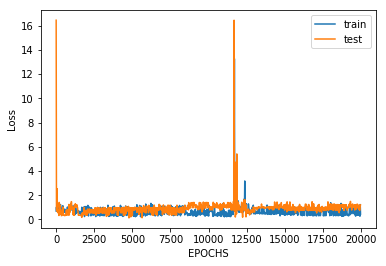

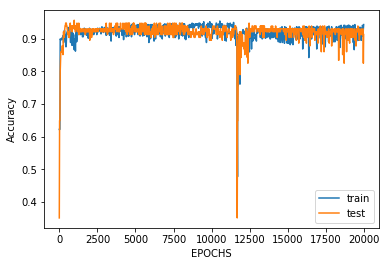

In [35]:
plot_loss(epoch_his,train_loss_his,test_loss_his)
plot_accuracy(epoch_his,train_acc_his,test_acc_his)

In [36]:
#Accuracy on Test Set
import Metrics
Metrics.accuracy_multiclass(model.forward(X_test)[0],Y_test)

0.9298245614035088